In [1]:

import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import importlib.util
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))

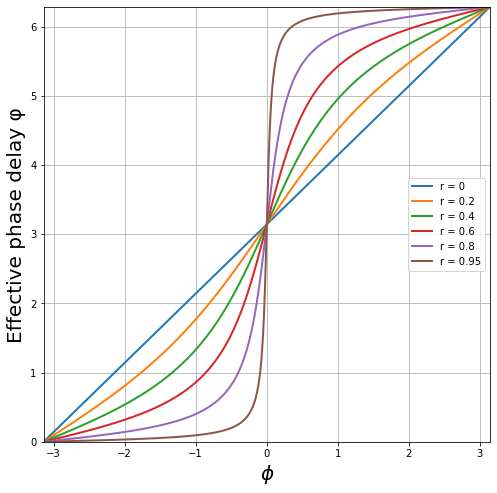

In [2]:

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
figure1 = plt.figure(figsize=(8, 8))

a=1 #zero attenuation
phi = np.linspace(-np.pi,np.pi, 1000)
r = [0, 0.2, 0.4, 0.6, 0.8, 0.95]

for i in range(0,len(r)):

    phi_eff = np.pi + phi + np.arctan(r[i]*np.sin(phi)/(a-r[i]*np.cos(phi))) + np.arctan(r[i]*a*np.sin(phi)/(1-r[i]*a*np.cos(phi)))
    plt.plot(phi,phi_eff, label='r = '+str(r[i]), linewidth=2)
    plt.grid(True)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([0, 2*np.pi])
    plt.ylabel('Effective phase delay '+ 'φ', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='center right')

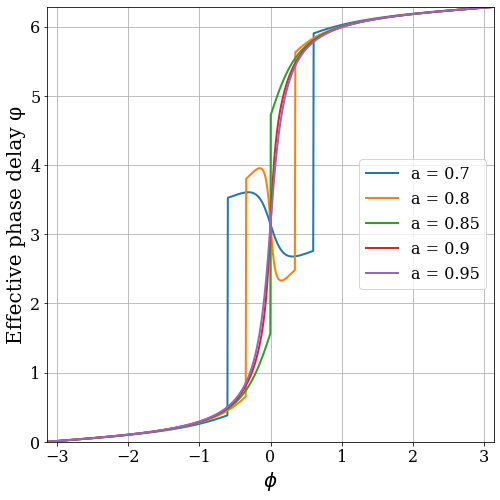

In [3]:
figure2 = plt.figure(figsize=(8, 8))
plt.rc('font', **font)
r = 0.85
a = [ 0.7, 0.8, 0.85, 0.9, 0.95]
phi = np.linspace(-np.pi,np.pi, 1000)

for i in range(0, len(a)):
    phi_eff = np.pi + phi + np.arctan(r*np.sin(phi)/(a[i]-r*np.cos(phi))) + np.arctan(r*a[i]*np.sin(phi)/(1-r*a[i]*np.cos(phi)))
    plt.plot(phi,phi_eff, label='a = '+str(a[i]), linewidth=2)
    plt.grid(True)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([0, 2*np.pi])
    plt.ylabel('Effective phase delay '+ 'φ', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='center right')

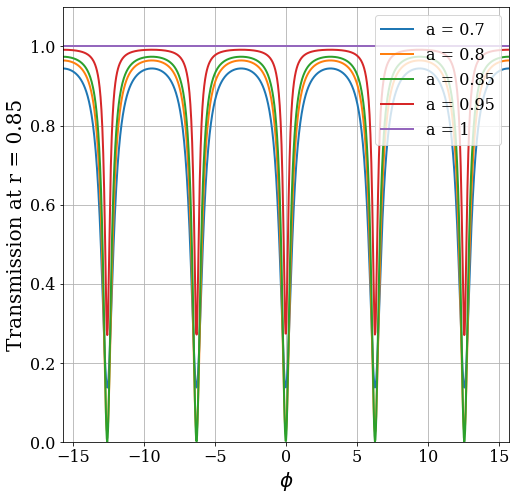

In [4]:
figure3 = plt.figure(figsize=(8, 8))
r = 0.85
a = [ 0.7,0.8,0.85, 0.95, 1]
phi = np.linspace(-5*np.pi,5*np.pi, 1000)
for i in range(0, len(a)):
    T = (a[i]**2 - 2*r*a[i]*np.cos(phi) + (r)**2)/(1 - 2*a[i]*r*np.cos(phi) + (r*a[i])**2)
    plt.plot(phi, T, label= 'a = ' + str(a[i]), linewidth = 2)
    plt.grid(True)
    plt.xlim([-5*np.pi,5*np.pi])
    plt.ylim([0, 1.1])
    plt.ylabel('Transmission at r = 0.85', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='upper right')

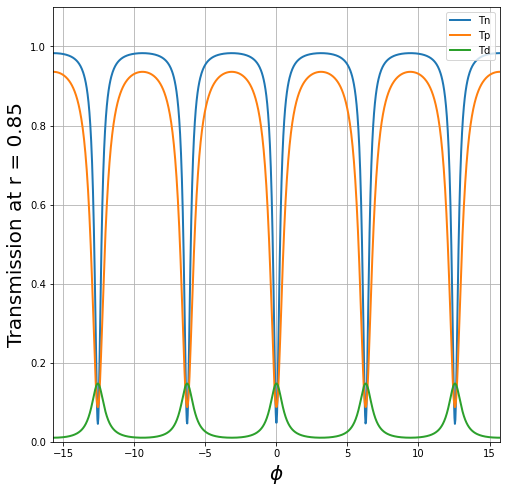

In [38]:
figure3 = plt.figure(figsize=(8, 8))
r1= 0.9
r2 = 0.9
r = 0.9
a = 0.85
phi = np.linspace(-5*np.pi,5*np.pi, 1000)

T_n = (a**2 - 2*r*a*np.cos(phi) + (r)**2)/(1 - 2*a*r*np.cos(phi) + (r*a)**2)
T_p = ((r*a)**2 - 2*r**2*a*np.cos(phi) + r**2)/(1 - 2*r**2*a*np.cos(phi)+(r*a)**2)
T_d = (1-r**2)*(1-r**2)*a/(1 - 2*r**2*a*np.cos(phi)+(r*a)**2)
plt.plot(phi, T_n, label= 'Tn', linewidth = 2)
plt.plot(phi, T_p, label= 'Tp', linewidth = 2)
plt.plot(phi, T_d, label= 'Td', linewidth = 2)
plt.grid(True)
plt.xlim([-5*np.pi,5*np.pi])
plt.ylim([0, 1.1])
plt.ylabel('Transmission at r = 0.85', size = '20')
plt.xlabel('$\phi$', size = 20)
plt.legend(loc='upper right')

In [5]:
c = 299792458
lambd = 1550e-9 
ng = 4.622
FSR = 25.6e-9
FWHM = lambd**2*(100e9)/c
L = lambd**2/(ng*FSR)
Q = lambd/FWHM
radius = L/(2*np.pi)
delta_n = 1.98577 - 1.876785
T11 = np.sqrt(((ng*L*np.pi)/(2*Q*lambd))**2 + 1) - (ng*L*np.pi)/(2*Q*lambd)
T12 = np.sqrt(1-T11**2)
Lc = lambd/(np.pi*delta_n)*np.arcsin(T12)
print(radius)
print(Lc)


3.2315704002112736e-06
1.407798473103697e-06


In [3]:
beta_0 = 2*np.pi/lambd*1.98577
beta_1 = 2*np.pi/lambd*1.876785
np.pi/(beta_0-beta_1)

7.111070330779467e-06

In [69]:
fdtd =lumapi.FDTD(filename= 'halfring.fsp')

In [70]:
def RectInsert(X,XSPAN,Y,YSPAN,Z,ZSPAN,MATERIAL,lumerical):
    
    lumerical.switchtolayout()
    lumerical.addrect()
    lumerical.set({"x":X,"y":Y,"z":Z,
         "x span":XSPAN, "y span":YSPAN, "z span":ZSPAN,
         "material":MATERIAL
        })

In [86]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

RectInsert(0, 15e-6, 0, 0.4e-6,0, 0.18e-6, "Si (Silicon) - Palik", fdtd)
fdtd.set("name","rect_up")
RectInsert(0, 5e-6, -0.5e-6, 0.4e-6,0, 0.18e-6, "Si (Silicon) - Palik", fdtd)
fdtd.set("name","rect_down")

fdtd.addring()
fdtd.set("name","ring_left")
fdtd.set({"x":-2.5e-6,
"y":-3.73e-6,
"z":0,
"z span":0.18e-6,
"outer radius":3.43e-6,
"inner radius":3.03e-6,
"theta start":90,
"theta stop":180,
"material":"Si (Silicon) - Palik"
})

fdtd.addring()
fdtd.set("name","ring_right")
fdtd.set({"x":2.5e-6,
"y":-3.73e-6,
"z":0,
"z span":0.18e-6,
"outer radius":3.43e-6,
"inner radius":3.03e-6,
"theta start":0,
"theta stop":90,
"material":"Si (Silicon) - Palik"
})

fdtd.addrect()
fdtd.set("name",'rect_left')
fdtd.set({"x":-5.73e-6,
"x span":0.4e-6,
"y max":-3.73e-6,
"y min":-4.73e-6,
"z":0,
"z span":0.18e-6,
"material":"Si (Silicon) - Palik"})

fdtd.addrect()
fdtd.set("name",'rect_right')
fdtd.set({"x":5.73e-6,
"x span":0.4e-6,
"y max":-3.73e-6,
"y min":-4.73e-6,
"z":0,
"z span":0.18e-6,
"material":"Si (Silicon) - Palik"})

